<a href="https://colab.research.google.com/github/KimYongHwi/machine-learning-study/blob/main/natural_language_processing/12_%EA%B0%90%EC%A0%95_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 감정 분석(Sentiment Analysis)

- 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
- 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
- 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요하다.
- 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우된다.
- 토픽 모델링이 텍스트의 주제를찾아낸다면, 감정 분석은 텍스트의 의견을 찾아낸다.
- 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있다.

![2655364B5925AC9606[1].png](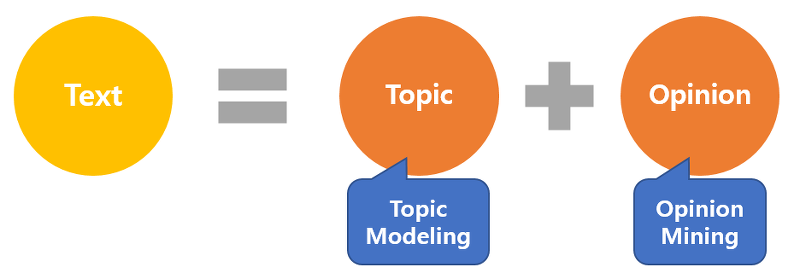)

- 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있다.
- 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대한 신속한 대처가 가능하다.
- 파이썬으로 감정 분석 하는 방법은 크게 두 가지로 구분된다.
  - 감정 어휘 사전을 이용한 감정 상태 분류
    - 미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산한다.
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정희해둬야 한다.
  - 기계학습을 이용한 감정 상태 분류
    - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류한다.
    - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며, 이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류한다.

**감정 사전 준비**

- 감정 사전 라이브러리 설치
- afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공한다.

In [1]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=1c5d4c6a76156e6efd58e29433e44c754ab5a6cdefa171bdab7e1581c646e88d
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


**데이터 준비**

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### 감정 상태 분류 및 시각화

- 감정 사전을 구성하고 감정 스코어를 측정
- afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 메소드를 제공

In [3]:
from afinn import Afinn

afinn = Afinn()

for i in range(10):
    print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


- 모든 뉴스에 대한 감정을 시각화
- 긍정과 부정에 대한 개수를 시각화

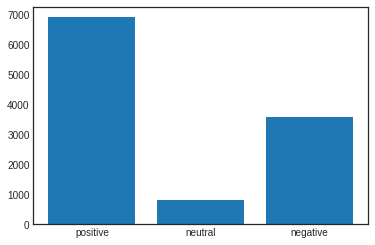

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

positive = 0
neutral = 0
negative = 0

for news in newsdata.data:
    score = afinn.score(news)

    if score > 0:
        positive += 1
    elif score == 0:
        neutral += 1
    else:
        negative += 1

plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['positive', 'neutral', 'negative'])
plt.show()

### 기계학습을 이용한 감정 분석

- 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치
  - https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh |bash -x

In [6]:
import re
import urllib.request
import pandas as pd

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

- 네이벼 영화 리뷰 데이터
- 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  - https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  - https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
- 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [7]:
train_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
test_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt")

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

train_data.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


- 중복 및 결측치 처리
  - 데이터 개수 확인
  - 데이터에 중복이 존재한다면 이를 제거

In [8]:
print(train_data['document'].nunique())
print(train_data['label'].nunique())

train_data.drop_duplicates(subset=['document'], inplace=True)

146182
2


In [9]:
print(train_data.isnull().sum())

train_data = train_data.dropna(how='any')

id          0
document    1
label       0
dtype: int64


- 데이터에서 한글과 공백을 제외하고 모두 제거

In [10]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
train_data.head(10)

,id,document,label
0,9976970,아더빙진짜짜증나네요목소리,0
1,3819312,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소이야기구먼솔직히재미는없다평점조정,0
4,6483659,사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...,1
5,5403919,막걸음마뗀세부터초등학교학년생인살용영화ㅋㅋㅋ별반개도아까움,0
6,7797314,원작의긴장감을제대로살려내지못했다,0
7,9443947,별반개도아깝다욕나온다이응경길용우연기생활이몇년인지정말발로해도그것보단낫겟다납치감금만반복...,0
8,7156791,액션이없는데도재미있는몇안되는영화,1
9,5912145,왜케평점이낮은건데꽤볼만한데헐리우드식화려함에만너무길들여져있나,1


In [11]:
train_data['document'].replace('', np.nan, inplace=True)
print(len(train_data))
print(train_data.isnull().sum())

146182
id            0
document    789
label         0
dtype: int64


In [12]:
train_data = train_data.dropna(how='any')
print(len(train_data))

145393


In [13]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
test_data['document'].replace('', np.nan, inplace=True)
test_data = train_data.dropna(how='any')

- 토근화 및 불용어 제거
  - 단어들을 분리하고 불용어를 제거함
  - 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`

In [14]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
mecab = Mecab()

X_train = []

for sentence in train_data['document']:
    X_train.append([word for word in mecab.morphs(sentence) if not word in stopwords])

In [16]:
print(X_train[:1])

[['아', '더', '빙', '진짜', '짜증', '나', '네', '요목', '소리']]


In [17]:
X_test = []

for sentence in test_data['document']:
    X_test.append([word for word in mecab.morphs(sentence) if not word in stopwords])

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'영화': 1, '다': 2, '고': 3, '하': 4, '을': 5, '보': 6, '게': 7, '지': 8, '있': 9, '없': 10, '좋': 11, '나': 12, '었': 13, '는데': 14, '만': 15, '너무': 16, '봤': 17, '적': 18, '안': 19, '로': 20, '정말': 21, '것': 22, '지만': 23, '네요': 24, '어': 25, '음': 26, '같': 27, '아': 28, '진짜': 29, '재밌': 30, '에서': 31, '했': 32, '기': 33, '않': 34, '네': 35, '았': 36, '거': 37, '수': 38, '되': 39, '면': 40, '인': 41, 'ㅋㅋ': 42, '말': 43, '연기': 44, '점': 45, '최고': 46, '평점': 47, '주': 48, '이런': 49, '내': 50, '던': 51, '할': 52, '어요': 53, '겠': 54, '왜': 55, '스토리': 56, '습니다': 57, '해': 58, 'ㅋㅋㅋ': 59, '아니': 60, '듯': 61, '드라마': 62, '그': 63, '생각': 64, '사람': 65, '싶': 66, '더': 67, '감동': 68, '때': 69, '배우': 70, '까지': 71, '함': 72, '본': 73, '보다': 74, '만들': 75, '뭐': 76, '내용': 77, '감독': 78, '알': 79, '볼': 80, '라': 81, '그냥': 82, '재미있': 83, '시간': 84, '지루': 85, '중': 86, '재미없': 87, '재미': 88, '였': 89, '잼': 90, '사랑': 91, '쓰레기': 92, '못': 93, '냐': 94, '라고': 95, '서': 96, '년': 97, '면서': 98, '다시': 99, '니': 100, '나오': 101, '작품': 102, '번': 103, '하나': 104, '이거': 105, '해서': 

- 빈도 수가 낮은 단어 제거
  - 빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
  - 처리를 통해 빈도 수가 낮은 단어들은 제거

In [19]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

print(tokenizer.word_counts.items())

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value

    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value
    
print('전체 단어 수:', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수: {}'.format(threshold - 1, rare_cnt))
print('희귀 단어 비율: {}'.format((rare_cnt / words_cnt) * 100))
print('희귀 단어 등장 빈도 비율: {}'.format((rare_freq / words_freq) * 100))

odict_items([('아', 8364), ('더', 4905), ('빙', 264), ('진짜', 8040), ('짜증', 1398), ('나', 11998), ('네', 7576), ('요목', 3), ('소리', 576), ('흠', 219), ('포스터', 549), ('보고', 870), ('초딩', 404), ('영화', 55877), ('줄', 2778), ('오버', 131), ('연기', 6616), ('조차', 315), ('가볍', 226), ('지', 18106), ('않', 7594), ('구나', 742), ('너무', 10625), ('재', 1968), ('밓었다그래서보는것을추천한다', 1), ('교도소', 11), ('이야기', 2177), ('구먼', 33), ('솔직히', 1064), ('재미', 3544), ('없', 15104), ('다', 52010), ('평점', 6025), ('조정', 41), ('사이몬페그', 2), ('익살', 10), ('스런', 216), ('돋보였', 59), ('던', 5850), ('스파이더맨', 61), ('에서', 7939), ('늙', 192), ('어', 8537), ('보이', 877), ('기', 7605), ('만', 11190), ('했', 7838), ('커스틴던스트', 5), ('너무나', 716), ('이뻐', 68), ('보였', 119), ('막', 361), ('걸음마', 2), ('뗀', 3), ('세', 549), ('부터', 1899), ('초등', 141), ('학교', 394), ('학년', 128), ('생', 356), ('인', 6903), ('살용', 1), ('ㅋㅋㅋ', 5144), ('별반', 156), ('개', 2024), ('아까움', 331), ('원작', 1314), ('긴장감', 810), ('을', 29522), ('제대로', 812), ('살려', 96), ('내', 5857), ('못했', 305), ('아깝', 2116),

In [20]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

22248


In [21]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [22]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [23]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

145380
145380


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


**패딩**
- 리뷰의 전반적인 길이를 확인
- 모델의 입력을 위해 동일한 길이로 맞춰줌

In [24]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이:', sum(map(len, X_train)) / len(X_train))

리뷰 최대 길이: 83
리뷰 평균 길이: 13.430306782225891


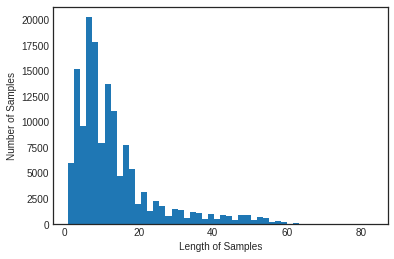

In [25]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [26]:
max_len = 60

In [27]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

**모델 구축 및 학습**
- 감정 상태 분류 모델을 선언하고 학습
- 모델은 일반적인 LSTM 모델을 사용

In [28]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2224800   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,342,177
Trainable params: 2,342,177
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=60,
    validation_split=0.2
)

Epoch 1/15
1939/1939 [==============================] - 41s 18ms/step - loss: 0.3981 - acc: 0.8187 - val_loss: 0.3591 - val_acc: 0.8362
Epoch 2/15
1939/1939 [==============================] - 33s 17ms/step - loss: 0.3291 - acc: 0.8574 - val_loss: 0.3346 - val_acc: 0.8530
Epoch 3/15
1939/1939 [==============================] - 32s 17ms/step - loss: 0.3015 - acc: 0.8713 - val_loss: 0.3318 - val_acc: 0.8570
Epoch 4/15
1939/1939 [==============================] - 32s 16ms/step - loss: 0.2804 - acc: 0.8826 - val_loss: 0.3265 - val_acc: 0.8590
Epoch 5/15
1939/1939 [==============================] - 32s 17ms/step - loss: 0.2631 - acc: 0.8913 - val_loss: 0.3214 - val_acc: 0.8622
Epoch 6/15
1939/1939 [==============================] - 32s 17ms/step - loss: 0.2479 - acc: 0.8987 - val_loss: 0.3240 - val_acc: 0.8591
Epoch 7/15
1939/1939 [==============================] - 33s 17ms/step - loss: 0.2333 - acc: 0.9059 - val_loss: 0.3305 - val_acc: 0.8589
Epoch 8/15
1939/1939 [==========================

**시각화**

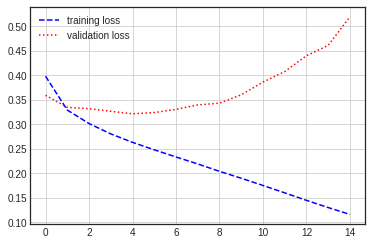

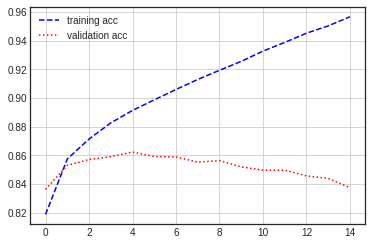

In [31]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()

plt.plot(acc, 'b--', label='training acc')
plt.plot(val_acc, 'r:', label='validation acc')
plt.legend()
plt.grid()

plt.show()

**감정 예측**

In [32]:
def sentiment_predict(new_sentence):
    new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score = float(model.predict(new_pad))

    if score > 0.5:
        print("{} -> 긍정({:.2f}%)".format(new_sentence, score * 100))
    else:
        print("{} -> 부정({:.2f}%)".format(new_sentence, (1 - score) * 100))

In [33]:
sentiment_predict('정말 재미있고 흥미진진했어요.')
sentiment_predict('어떻게 이렇게 지루하고 재미없죠?')
sentiment_predict('배우 연기력이 대박입니다.')
sentiment_predict('분위기가 어둡고 스토리가 복잡해요')

정말 재미있고 흥미진진했어요. -> 긍정(99.74%)
어떻게 이렇게 지루하고 재미없죠? -> 부정(99.82%)
배우 연기력이 대박입니다. -> 긍정(93.45%)
분위기가 어둡고 스토리가 복잡해요 -> 긍정(62.76%)


**네이버 쇼핑 리뷰 데이터**
- 참고: https://wikidocs.net/94600
- 데이터 로드: https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt


In [43]:
naver_shopping_file = urllib.request.urlopen('https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt')

In [44]:
total_data = pd.read_table(naver_shopping_file, names=['ratings', 'reviews'])

In [46]:
total_data.head(3)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...


In [47]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


**훈련 데이터와 테스트 데이터 분리**

In [48]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)

In [49]:
total_data.head(3)

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1


In [51]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [52]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)

In [54]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=111)
print(len(train_data))
print(len(test_data))

149931
49977


**레이블 분포 확인**

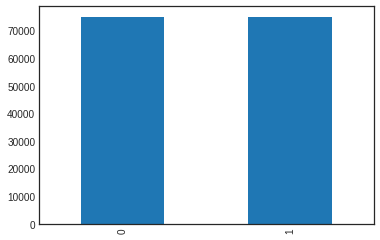

In [55]:
train_data['label'].value_counts().plot(kind='bar')

In [56]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,74974
1,1,74957


**데이터 정제**

In [57]:
train_data['reviews'] = train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
train_data['reviews'].replace('', np.nan, inplace=True)
print(len(train_data))

149931


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [58]:
test_data.drop_duplicates(subset=['reviews'], inplace=True)
test_data['reviews'] = test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
test_data['reviews'].replace('', np.nan, inplace=True)
print(len(test_data))

49977


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

**토큰화 및 불용어 제거**

- 불용어 사전: `'도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게'`

In [59]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [60]:
mecab = Mecab()

train_data['reviews'] = train_data['reviews'].apply(mecab.morphs)
train_data['reviews'] = train_data['reviews'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [61]:
test_data['reviews'] = test_data['reviews'].apply(mecab.morphs)
test_data['reviews'] = test_data['reviews'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
X_train = train_data['reviews'].values
y_train = train_data['label'].values
X_test = test_data['reviews'].values
y_test = test_data['label'].values

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(149931,)
(149931,)
(49977,)
(49977,)


**빈도 수가 낮은 단어 제거**

In [65]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [66]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

print(tokenizer.word_counts.items())

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value

    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value
    
print('전체 단어 수:', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수: {}'.format(threshold - 1, rare_cnt))
print('희귀 단어 비율: {}'.format((rare_cnt / words_cnt) * 100))
print('희귀 단어 등장 빈도 비율: {}'.format((rare_freq / words_freq) * 100))

odict_items([('잇몸', 21), ('좋', 48172), ('꺼', 1343), ('같', 16381), ('으네', 161), ('용', 3359), ('괜찮', 4359), ('긴', 3368), ('한데', 1348), ('냄새', 3810), ('안', 23464), ('없', 11357), ('어', 15490), ('네요', 48602), ('판매자', 473), ('님', 1373), ('말', 1756), ('대로', 554), ('필터', 146), ('말려서', 51), ('써도', 137), ('그렇', 901), ('몇', 1748), ('날', 1331), ('건조', 518), ('방', 351), ('꺼내', 198), ('두', 5004), ('었', 9316), ('다가', 2607), ('다시', 2720), ('끼워도', 18), ('여전히', 138), ('납니다', 561), ('가격', 8301), ('더', 6891), ('내렸', 23), ('ㅠㅠ', 3687), ('안심', 187), ('사용', 10730), ('할', 6562), ('수', 5067), ('있', 25217), ('것', 11441), ('아요', 28273), ('아직', 3133), ('초기', 60), ('라서', 1104), ('작', 5627), ('거', 14687), ('만', 9557), ('했', 21098), ('사이즈', 5965), ('체', 48), ('킹', 47), ('해서', 10845), ('주문', 7944), ('건데', 1413), ('맞', 4724), ('아서', 8865), ('아쉽', 1677), ('반품', 2975), ('귀찮', 1995), ('그냥', 8685), ('놔뒀', 31), ('어요', 31614), ('흰색', 391), ('샀', 5548), ('는데', 31210), ('분홍색', 31), ('왔어요', 282), ('아이', 3027), ('장난감', 181), ('

In [67]:
vocab_size = words_cnt - rare_cnt + 2 # padding, oov 때문에 +2
vocab_size

17963

In [68]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [69]:
print(X_train[:2])
print(X_test[:2])

[[5439, 3, 265, 15, 1414, 107], [84, 106, 263, 93, 10, 27, 16, 2, 604, 257, 204, 536, 1528, 3171, 1585, 365, 205, 268, 564, 757, 1195, 79, 37, 142, 137, 5928, 1579, 93, 530, 49, 59, 5190, 2, 98]]
[[12, 68, 2, 44, 338, 73, 24, 22, 4178, 241, 2], [1063, 2515, 3033, 706, 717, 9, 101, 52, 19, 49, 83]]


In [70]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이:', sum(map(len, X_train)) / len(X_train))

리뷰 최대 길이: 85
리뷰 평균 길이: 14.819937171098706


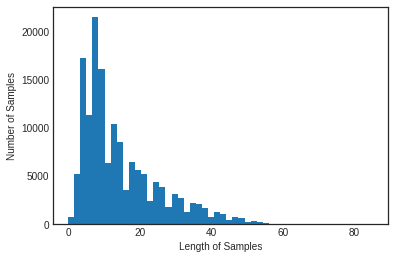

In [71]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [72]:
max_len = 60

In [73]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

**모델 구축 및 학습**

In [74]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [75]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [76]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True)

In [77]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1796300   
_________________________________________________________________
gru (GRU)                    (None, 128)               88320     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,884,749
Trainable params: 1,884,749
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
2000/2000 [==============================] - 40s 19ms/step - loss: 0.2781 - acc: 0.8917 - val_loss: 0.2584 - val_acc: 0.9024
Epoch 2/15
2000/2000 [==============================] - 38s 19ms/step - loss: 0.2239 - acc: 0.9166 - val_loss: 0.2332 - val_acc: 0.9152
Epoch 3/15
2000/2000 [==============================] - 37s 18ms/step - loss: 0.2074 - acc: 0.9229 - val_loss: 0.2246 - val_acc: 0.9164
Epoch 4/15
2000/2000 [==============================] - 37s 18ms/step - loss: 0.1964 - acc: 0.9276 - val_loss: 0.2311 - val_acc: 0.9145
Epoch 5/15
2000/2000 [==============================] - 36s 18ms/step - loss: 0.1875 - acc: 0.9318 - val_loss: 0.2291 - val_acc: 0.9156
Epoch 6/15
2000/2000 [==============================] - 38s 19ms/step - loss: 0.1789 - acc: 0.9353 - val_loss: 0.2419 - val_acc: 0.9109
Epoch 7/15
2000/2000 [==============================] - 37s 18ms/step - loss: 0.1701 - acc: 0.9386 - val_loss: 0.2307 - val_acc: 0.9148


In [79]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test)

1562/1562 [==============================] - 11s 7ms/step - loss: 0.2201 - acc: 0.9183


[0.2201281487941742, 0.9182823896408081]

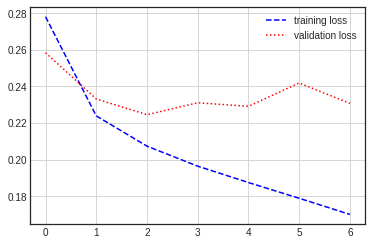

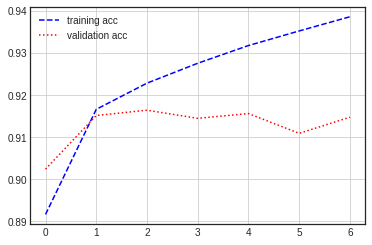

In [80]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()

plt.plot(acc, 'b--', label='training acc')
plt.plot(val_acc, 'r:', label='validation acc')
plt.legend()
plt.grid()

plt.show()

**감정 예측**

In [82]:
def sentiment_predict(new_sentence):
    new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score = float(loaded_model.predict(new_pad))

    if score > 0.5:
        print("{} -> 긍정({:.2f}%)".format(new_sentence, score * 100))
    else:
        print("{} -> 부정({:.2f}%)".format(new_sentence, (1 - score) * 100))

In [83]:
sentiment_predict('처음 써봤는데 대박 좋아요')
sentiment_predict('원래 배송이 이렇게 늦나요?')
sentiment_predict('좋은거 인정! 추가 구매 의향 있습니다')
sentiment_predict('이건 정말 리뷰 쓰는게 아깝네요')

처음 써봤는데 대박 좋아요 -> 긍정(98.51%)
원래 배송이 이렇게 늦나요? -> 부정(92.58%)
좋은거 인정! 추가 구매 의향 있습니다 -> 긍정(95.21%)
이건 정말 리뷰 쓰는게 아깝네요 -> 부정(97.34%)
